In [2]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
## import timeseries data
data = pd.read_csv('airline-passenger-traffic.csv')

data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format = '%Y-%m')
data = data.set_index('Month')

In [8]:
data.head(12)

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0
1949-10-01,119.0


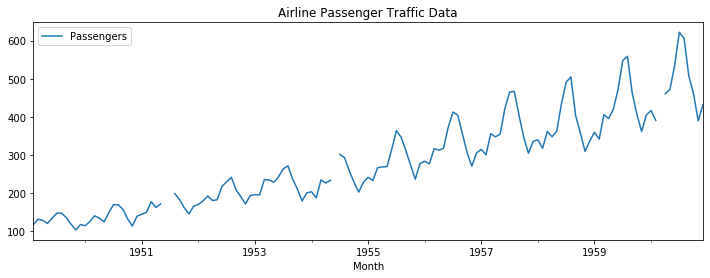

In [9]:
# Time series analysis
# Plot timeseries data

data.plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic Data')
plt.show(block  = False)

#### Missing Value Treatment

In [10]:
# Mean Imputation
data = data.assign(Passengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))

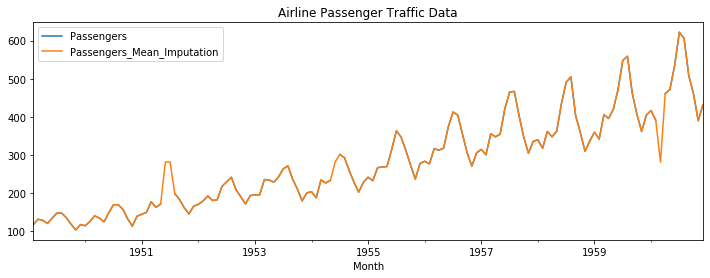

In [11]:
# Time series analysis
# Plot timeseries data

data.plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic Data')
plt.show(block  = False)

## Linear Interpolation

In [13]:
# Mean Imputation
data = data.assign(Passengers_Mean_Interpolation = data.Passengers.interpolate( method = 'linear'))

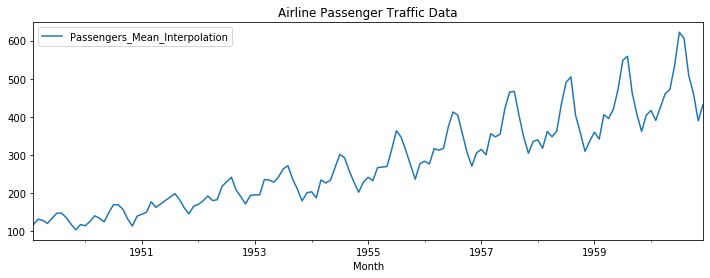

In [14]:
# Time series analysis
# Plot timeseries data

data[['Passengers_Mean_Interpolation']].plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic Data')
plt.show(block  = False)

In [15]:
data['Passengers'] = data['Passengers_Mean_Interpolation']

## Outlier Detection

In [16]:
import seaborn as sns

### Boxplot

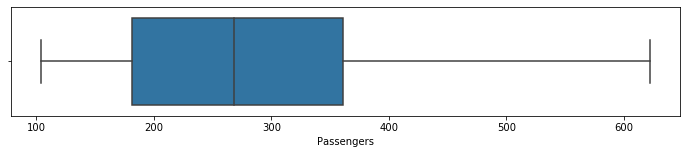

In [17]:
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot( x = data['Passengers'], whis = 1.5)

### Histogram

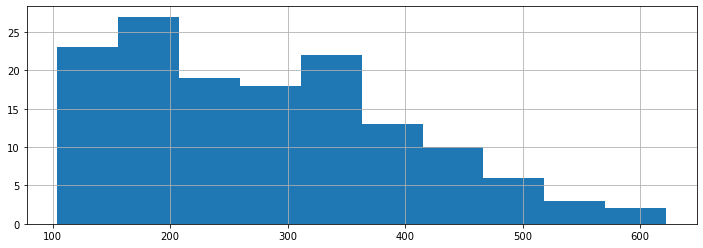

In [18]:
fig = data.Passengers.hist(figsize = (12,4))

### Timeseries Decomposition

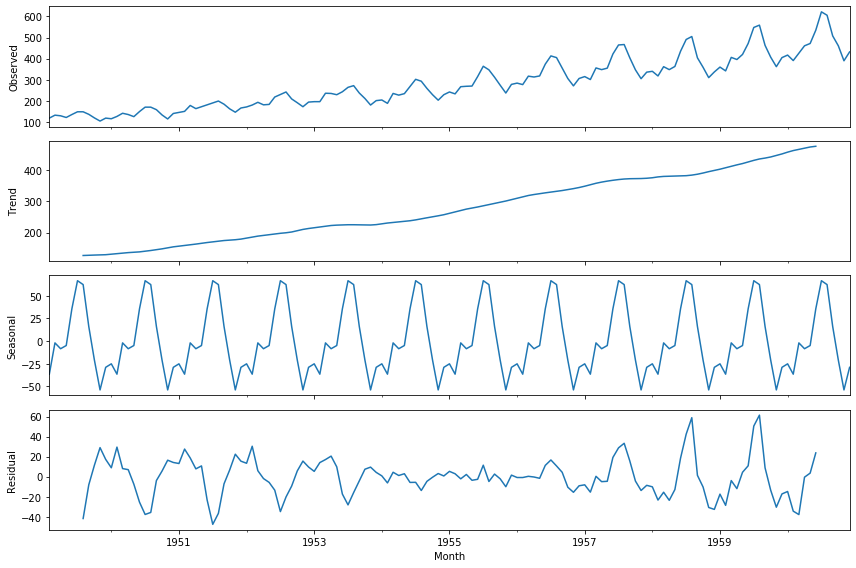

In [22]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decompostion = sm.tsa.seasonal_decompose(data.Passengers, model = 'additive')

fig = decompostion.plot()
plt.show()

### multiplicative Timeseries Decomposition

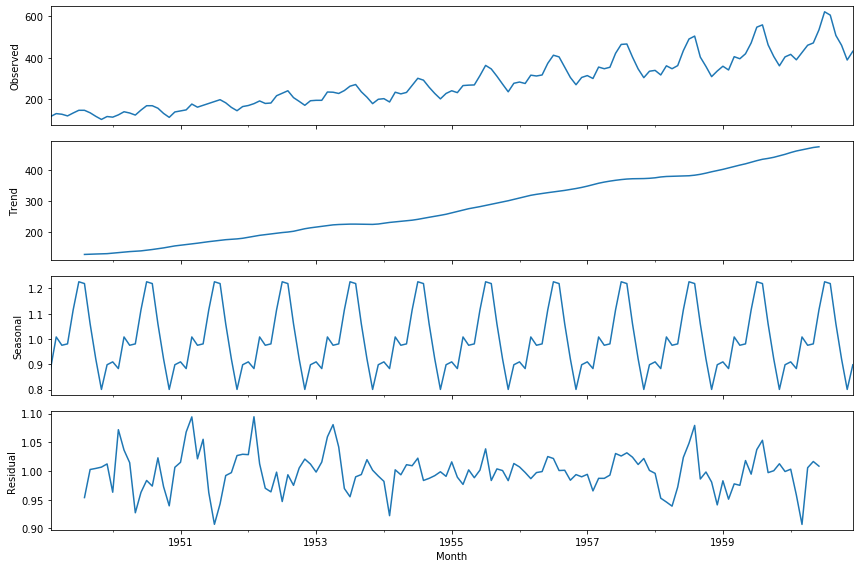

In [23]:
decompostion = sm.tsa.seasonal_decompose(data.Passengers, model = 'multiplicative')

fig = decompostion.plot()
plt.show()